# Demo 9 : Scikit-learn Library

This demo is largely inspired from http://scikit-learn.org/stable/tutorial/index.html

You will implement:
- train test split
- fitting a model
- creating a train/validation curve
- SVMs and their hyperparameters
- plotting decision boundaries
- basic bagging/boosting


In [1]:
# Verify that sklearn is properly installed by running this cell
import sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Loading the data

sklearn allows directly loading a certain number of datasets. We ask you here to manipulate the functions for loading them.

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
digits = datasets.load_digits()

In [6]:
iris.data.shape

(150, 4)

iris (150, 4) (150,)
digits (1797, 64) (1797,)
3


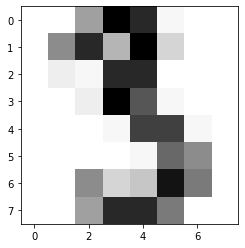

In [12]:
# Print the shapes of the datasets
print('iris', iris.data.shape, iris.target.shape)
print('digits', digits.data.shape, digits.target.shape)

# Print a digits example
i = 3
plt.imshow(digits.data[i,:].reshape(8, 8), interpolation="nearest", cmap='Greys')
print(digits.target[i])

# k-NN Classification

## iris dataset

We will again use the iris dataset. You should separate it into train/test.

In [2]:
# Manual separation into train/test
np.random.seed(0)
indices = np.random.permutation(len(iris.target))
old_iris_train_x = iris.data[indices[:100]]
old_iris_test_x = iris.data[indices[100:]]
old_iris_train_y = iris.target[indices[:100]]
old_iris_test_y = iris.target[indices[100:]]

# Now use sklearn.model_selection.train_test_split to do the same thing
from sklearn.model_selection import train_test_split

(iris_train_x, iris_test_x, 
 iris_train_y, iris_test_y) = train_test_split(iris.data, iris.target, test_size=100)

print(iris_train_x.shape, iris_train_y.shape)

NameError: ignored

We can now use the sklearn functions to implement a nearest neighbor classifier.

In [0]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(iris_train_x, iris_train_y)
knn.predict(iris_train_x)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1,
       1, 2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0])

Maintenant, faire varier le k des k-plus proches voisins, puis afficher la performance en fonction de k

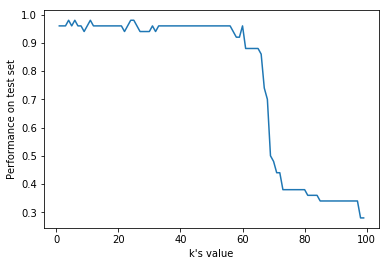

In [0]:
k_values = np.arange(1, 100)
k_perf = []

#TODO plot the validation curve for different k
for k in k_values:  # question
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(iris_train_x, iris_train_y)
    test_pred = knn.predict(iris_test_x)
    k_perf.append((test_pred == iris_test_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance on test set')
plt.plot(k_values, k_perf)

## Digits Dataset

We can now use the same classifier for another dataset: digits images.

In [0]:
np.random.seed(0)
indices = np.random.permutation(len(digits.target))

# Separate into train/test as usual
digits_train_x = digits.data[indices[:1500]]
digits_test_x = digits.data[indices[1500:]]
digits_train_y = digits.target[indices[:1500]]
digits_test_y = digits.target[indices[1500:]]

print(digits_train_x.shape, digits_train_y.shape)

(1500, 64) (1500,)


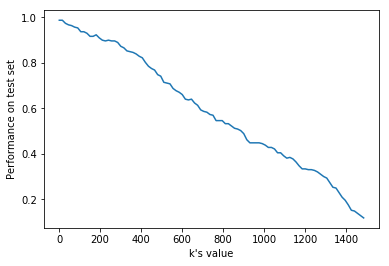

In [0]:
#TODO another validation curve

# We will vary k using jumps of 15
k_values = np.arange(1, 1500, 15)
k_perf = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(digits_train_x, digits_train_y)
    test_pred = knn.predict(digits_test_x)
    k_perf.append((test_pred == digits_test_y).mean())

plt.xlabel('k\'s value')
plt.ylabel('Performance on test set')
plt.plot(k_values, k_perf)

# SVM

Solutions to the SVM exercise. We look at the influence of the parameter C on the decision boundaries.

In [0]:
# We only keep 2 features, and 2 classes
iris_trainsvm_x = iris_train_x[np.logical_or(iris_train_y == 0, iris_train_y == 1)]
iris_trainsvm_y = iris_train_y[np.logical_or(iris_train_y == 0, iris_train_y == 1)]
iris_testsvm_x = iris_test_x[np.logical_or(iris_test_y == 0, iris_test_y == 1)]
iris_testsvm_y = iris_test_y[np.logical_or(iris_test_y == 0, iris_test_y == 1)]

iris_trainsvm_x  = iris_trainsvm_x[:,[0,1]]
iris_testsvm_x = iris_testsvm_x[:,[0,1]]

In [0]:
# Helper function that takes a dataset and returns
# (x,y) coordinates for a grid covering
# the intervals [x.min(), x.max()] and [y.min(), y.max()]

def get_plot_grid(data):
    x_min, x_max = data[:,0].min(), data[:,0].max()
    y_min, y_max = data[:,1].min(), data[:,1].max()
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    return xx, yy

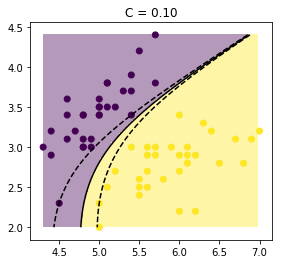

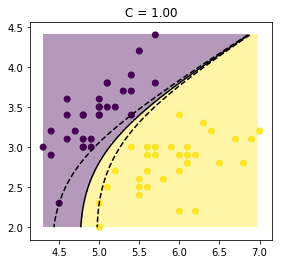

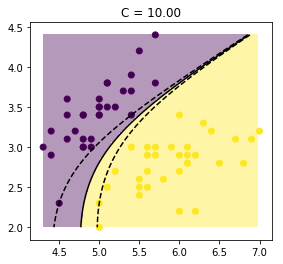

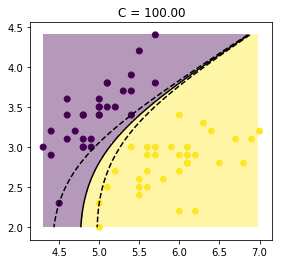

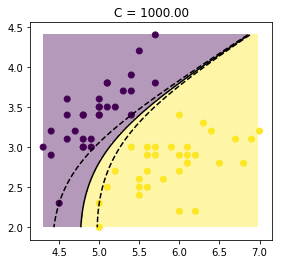

In [0]:
from sklearn.svm import SVC

for c in [.1, 1, 10, 100, 1000]:
    svc = SVC(kernel='poly', degree=10, C=c)
    svc.fit(iris_trainsvm_x, iris_trainsvm_y)

    # Points where to plot the decision function's value
    xx, yy = get_plot_grid(iris_trainsvm_x)

    # We get the value of the decision function on these points
    Z = svc.decision_function(np.c_[xx.ravel(), yy.ravel()])

    # We plot these points
    Z = Z.reshape(xx.shape)
    plt.imshow(Z > 0, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=.4, origin='lower')
    # We plot the lines [-.5, 0, .5] for the decision function
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],
            levels=[-1, 0, 1])
    # Finally we plot the points from the training set.
    plt.scatter(iris_trainsvm_x[:,0], iris_trainsvm_x[:,1], c=iris_trainsvm_y)
    plt.title('C = %.2f' % (c, ))
    
    plt.show()

# Plotting the decision regions in 2d

Using sklearn, it is easy to plot the decision regions for many different classifiers, to better understand how they separate the dataset.

You will probably need this helper function. Look at its parameters and then try it on knn.

In [0]:
def plot_regions(predictor, data_x, data_y, title=''):
    """
    predictor: training classifier. Must have a predict method
    data_x: n x d matrix, n the number of examples, d the number of features
    data_y: label vector, dimension (d, )
    title: plot title
    """
    xx, yy = get_plot_grid(data_x)
    
    Z = predictor.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.imshow(Z, extent=(xx.min(), xx.max(), yy.min(), yy.max()), alpha=0.4, origin='lower', interpolation='none')
    plt.scatter(data_x[:,0], data_x[:,1], c=data_y, marker='x')
    plt.title(title)
    
    plt.show()

In [0]:
# We only keep the 2 first features
iris_train2_x = iris_train_x[:,:2]
iris_test2_y = iris_test_x[:,:2]

print(iris_train2_x.shape, iris_test2_y.shape)

(100, 2) (50, 2)


Plot the decision regions for the classifiers we saw in class.

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron

classifiers = [
    ('bayes naif noyau gaussien', GaussianNB()),
    ('k-ppv', KNeighborsClassifier()),
    ('decision tree', DecisionTreeClassifier()),
    ('random forests', RandomForestClassifier()),
    ('svm rbf', SVC()),
    ('svm linear', SVC(kernel='linear')),
    ('bagging de knn', BaggingClassifier(KNeighborsClassifier(), max_samples=0.5, max_features=0.5))
]

In [7]:
for model_name, model_instance in classifiers:
    classifier = model_instance
    classifier.fit(iris_train2_x, iris_train_y)

    plot_regions(classifier, iris_train2_x, iris_train_y, title=model_name)

NameError: name 'classifiers' is not defined